# PyTorch. Evaluación de la calidad del vino.

<img src="https://saludconlupa.com/media/images/red-wine-pouring-from-bottle-glass.width-1920.jpg" width="600px" />

Vamos a crear y entrenar una red neuronal con PyTorch para clasificar la calidad del vino utilizando el conjunto de datos `wine` de `sklearn`.

## Importación de librerías

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# Modulo de PyTorch para definir optimizadores como Adam o SGD
import torch.optim as optim

# Función de scikit-learn para cargar el conjunto de datos de vino
from sklearn.datasets import load_wine

# Función de scikit-learn para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Clase para normalizar los datos (media 0, desviación estándar 1)
from sklearn.preprocessing import StandardScaler

# Funcion para calcular la precision
from sklearn.metrics import accuracy_score

# Para mostrar la matriz de confusiòn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Carga y exploración de datos

Usaremos el dataset `wine` de `sklearn`. Este dataset contiene características químicas y organolépticas de vinos y su calidad clasificada en 3 categorías. Haremos un clasificador que diga si un vino es malo, normal o bueno.

In [46]:
# Carga d edatos
dataset = load_wine()

In [47]:
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [48]:
# Descripción del dataset
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [49]:
# Nombres de las características
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [50]:
# Matriz de características
X = dataset.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [51]:
# Dimensiones de la matriz de características
X.shape

(178, 13)

In [52]:
y = dataset.target

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [54]:
# Categorías únicas del target
np.unique(y)

array([0, 1, 2])

In [55]:
# Cuenta cuántos casos hay en cada categoría
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [56]:
# Guarda en un diccionario cuántas ocurrencias hay para cada categoría
distribucion = dict(zip(np.unique(y), np.unique(y, return_counts=True)[1]))
distribucion

{0: 59, 1: 71, 2: 48}

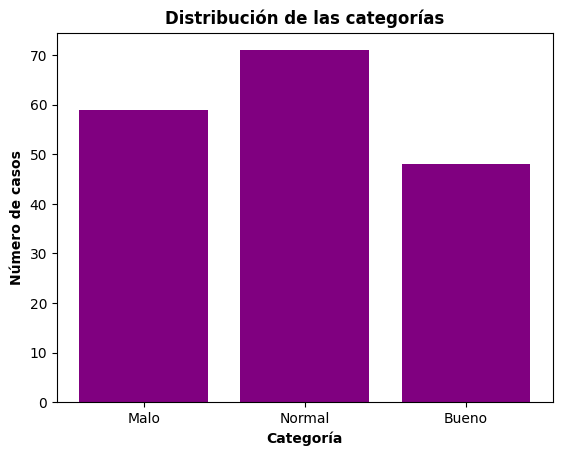

In [57]:
# Gráfica de barras de la distribución de las categorías
plt.bar(distribucion.keys(), distribucion.values(), color="purple")
plt.xticks(list(distribucion.keys()), labels=["Malo", "Normal", "Bueno"])
plt.xlabel("Categoría", fontweight="bold")
plt.ylabel("Número de casos", fontweight="bold")
plt.title("Distribución de las categorías", fontweight="bold")
plt.show()

## División y escalado de datos

Dividimos los datos en conjunto de entrenamiento y prueba.

Luego, normalizamos las características para que cada columna tenga una media $0$ y desviación estándar $1$. Esto suele mejorar el rendimiento del modelo, sobre todo con redes neuronales que son muy sensibles a las diferencias de escala.

Supongamos que una característica los valores originales: 

$[10, 12, 14, 16, 18]$

* Fórmula de la desviación estándar:
$\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}} = 2.83$

* Fórmula de la media: 
$\mu = \frac{\sum_{i=1}^{N} x_i}{N} = 14$

La media es $\mu = 14$ y la desviación estándar $\sigma = 2.83$

Después de la normalización:

$X_{normalizado} = \frac{X - \mu}{\sigma}$ 

Los valores se transforman en:

$[-1.41, -0.71, 0.0, 0.71, 1.41]$



In [58]:
# Divide los datos en entrenamiento y prueba
# stratify = y garantiza que la proporcion de clases en el conjunto de entrenamiento 
# y prueba sea similar a la del conjunto original, evitando el sesgo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [59]:
# Normalizacion de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train.dtype

dtype('float64')

## Conversión de arrays a tensores de PyTorch

In [61]:
# Con float32 tenemos suficiente precision y es mas eficiente el uso de memoria
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# Aunque las etiquetas se podrian almacenar en un entero corto, la funcion de perdida 
# que vamos a usar (CrossEntropyLoss) exige que el tipo sea long
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## Definición del modelo

Definimos una red neuronal con una capa oculta y funciones de activación ReLu. La salida usa una función de activación *SoftMax* para generar probabilidades.

In [62]:
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 16), # Capa de entrada
    nn.ReLU(),
    nn.Linear(16, 8), # Capa oculta
    nn.ReLU(),
    nn.Linear(8, len(distribucion)), # Capa de salida
    nn.Softmax(dim=1) # Softmax aplicado a la dimension de las clases
    # nn.softmax(dim=categorias.ndim)
)

In [63]:
# Usamos CrossEntropyLoss como funcion de perdida porque es buena en problemas multicategoria

criterion = nn.CrossEntropyLoss()

In [64]:
# Optimizador Adam con tasa de aprendizaje de 0.001
# El optimizador se encarga de ajustar los pesos y sesgos en cada iteracion del entrenamiento

optimizer = optim.Adam(model.parameters(), lr=0.001)

## Entrenamiento del modelo

Entrenaremos el modelo durante 100 épocas, imprimiendo la pérdida cada 10 épocas.

In [65]:
epochs = 350
for epoch in range(epochs):
    # Fordward pass / paso hacia adelante o prediccion
    outputs = model(X_train_tensor) # Calcula las salidas de la red neuronal, y_predichas
    loss = criterion(outputs, y_train_tensor)

    # Backward pass / Backpropagation / Paso hacia atras o Retropropagacion
    optimizer.zero_grad() # Limpia los gradientes acumulados, 
                          # el optimizador usa los gradientes para ajustar los pesos en la direccion que minimiza la perdida
    loss.backward()
    optimizer.step() # Actualiza los pesos

    if (epoch + 1) % 10 == 0: # Internamente seria el valor 11 por ejemplo en la primera iteracion
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/350], Loss: 1.0851
Epoch [20/350], Loss: 1.0736
Epoch [30/350], Loss: 1.0600
Epoch [40/350], Loss: 1.0425
Epoch [50/350], Loss: 1.0191
Epoch [60/350], Loss: 0.9879
Epoch [70/350], Loss: 0.9479
Epoch [80/350], Loss: 0.9000
Epoch [90/350], Loss: 0.8478
Epoch [100/350], Loss: 0.7954
Epoch [110/350], Loss: 0.7473
Epoch [120/350], Loss: 0.7064
Epoch [130/350], Loss: 0.6739
Epoch [140/350], Loss: 0.6492
Epoch [150/350], Loss: 0.6308
Epoch [160/350], Loss: 0.6171
Epoch [170/350], Loss: 0.6067
Epoch [180/350], Loss: 0.5986
Epoch [190/350], Loss: 0.5919
Epoch [200/350], Loss: 0.5863
Epoch [210/350], Loss: 0.5814
Epoch [220/350], Loss: 0.5775
Epoch [230/350], Loss: 0.5743
Epoch [240/350], Loss: 0.5716
Epoch [250/350], Loss: 0.5694
Epoch [260/350], Loss: 0.5675
Epoch [270/350], Loss: 0.5659
Epoch [280/350], Loss: 0.5645
Epoch [290/350], Loss: 0.5633
Epoch [300/350], Loss: 0.5623
Epoch [310/350], Loss: 0.5614
Epoch [320/350], Loss: 0.5606
Epoch [330/350], Loss: 0.5598
Epoch [340/350], Lo

## Evaluación del modelo

Calculamos la precisión en el conjunto de prueba para evaluar el rendimiento.

In [68]:
# Cambiar el modelo a modo de evaluacion

model.eval()

# Evalua en el conjunto de prueba

with torch.no_grad(): # Desactiva el calculo de gradientes
    outputs = model(X_test_tensor) # Realiza las predicciones 
    predictions = torch.argmax(outputs, dim=1).numpy() # Clase o valor mas alto de los tres, pasandolo a numpy despues

# Calcular la precision
test_accuracy = accuracy_score(y_test, predictions)
print(f"Precisión en el conjunto de pruebas: {test_accuracy * 100:.2f}%")

Precisión en el conjunto de pruebas: 97.22%


In [69]:
# Calcula la matriz de confusion
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  9]], dtype=int64)

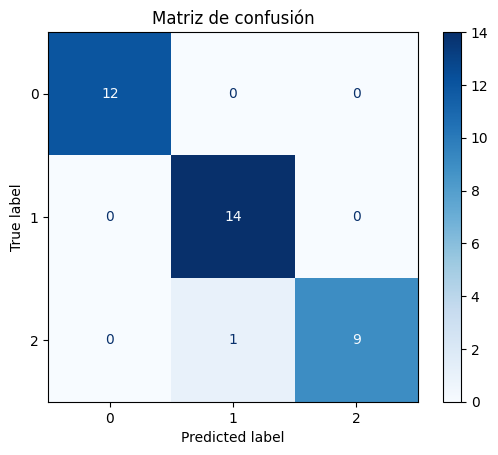

In [71]:
# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=distribucion)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión")
plt.show()